**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>

<div class="alert alert-info" role="alert">
Dear Reviewer,

<br>Nice to e-meet you. Thank you for reviewing my work.

<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Nice to meet you too, Rena! You're welcome!
    
A couple of comments about the project as a whole. I was really impressed with your work: both in the EDA and modeling you went far above what's required in this project! There are some tiny problems in the later sections, but they are pretty straightforward to fix. And just to reiterate, you did an excellent job overall!
  
</div>

<div class="alert alert-info" role="alert">
Hi Dmitry, 

<br>It's great to have you as my reviewer again! You've always been kind, and provided to-the-point advice to me. 

I consulted Dr Google :) and would like to give a go at undersampling. I also tried fixing the use of predict() with predict_proba(). Would you mind checking what I did is on the right track?  

Much appreciated!

<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
I guess there was another Dmitry reviewing your earlier projects, cause I mainly focus on reviewing the projects with machine learning, but still I'm delighted to hear that you found my review equally helpful! :)
    
Yep, you fixed all the problems I pointed out, so I'm glad to accept the project now. Keep up the good work on the next sprint! :)
  
</div>

# Megaline Telcom Product Recommendation by Machine Learning

Megaline is a telecommunications service provider. The company recently learned that many of the service subscribers use legacy plans. They want to develop a model that would analyze subscribers' behaviour and recommend one of Megaline's newer plans, Smart or Ultra.


**Project Outline**
<br>We are to develop a classifier model that learns to recognise a pattern using the hitorical data of subsribers who have already switched to one of the two new plans, then to recommend a suitable plan that matches the behaviour of a customer who is stil lwith a legacy plan. 

The model must produce a recommendation of the highest possible accuracy above the threshold of 0.75. The accuracy of the model performance is checked using the test dataset.


**Dataset**
<br>Every observation in the dataset contains monthly behavior information about one user. There are 3214 observations. 
<br>The information given is as follows:
<br>o сalls — number of calls,
<br>o minutes — total call duration in minutes,
<br>o messages — number of text messages,
<br>o mb_used — Internet traffic used in MB,
<br>o is_ultra — plan for the current month (Ultra - 1, Smart - 0).


**Caveat**
<br>The shuffting of the data in the training datasets gives the learning process its stochastic nature, and the outputs (scores such as the accuracy score) produced are non-deterministic. Every score generation during testing a trained model with a validation dataset produces a different set of scores. Therefore, a screenshot of the scores is included to enable the output received at the time to be referenced in the explanation of the model's performance. 


**Conclusion**
* Resampling the Smart subscriber observations in order to create a dataset with an equal proportion of Smart and Ultra subscribers did not help achieve a better learning performance. The more data there are, the better a model seems to learn. 
* Bagging Classier scored the highest in terms of overall accuracy and ROC-AUC score.
* Random Forest	Classier scored the best at learning how to classify Ultra subscribers, the minority class.
* Logistic Regression Classifer was the only model that learned with the resampled dataset to classify Smart and Ultra subscribers in equal proportion. 
* GridSearchCV did not find the best performing combination of hyperparameters - manual trial and error tends to find a better combination. 

# Tables of Contents <a class="anchor" id="table_of_contents"></a>

* [Step 1. Download the data and prepare it for analysis](#chapter1)
    * [Libraries](#section_1_1)
    * [Data Files](#section_1_2)
    * [Exploratory Data Analysis](#section_1_3)
    * [Conclusion](#section_1_4)
    * [Code Arsenal](#section_1_5)
* [Step 5. Additional task: sanity check the model](#chapter2)
* [Steps 2+3+4. Create and train models, and evaluate the performance](#chapter3)
    * [Resampling the dataset](#section_3_1)
        * [Decision tree binary classification](#section_3_1_1)
        * [Random forest binary classification](#section_3_1_2)
        * [Logistic regression](#section_3_1_3)
        * [Conclusion](#section_3_1_4)
    * [Using the raw dataset](#section_3_2)
        * [Decision tree binary classification](#section_3_2_1)
        * [Random forest binary classification](#section_3_2_2)
        * [Logistic regression](#section_3_2_3)
        * [Conclusion](#section_3_2_4)
* [Step 6. Overall Conclusion](#chapter4)

# Step 1. Download the data and prepare it for analysis <a class="anchor" id="chapter1"></a>

[Go back to the Table of Contents](#table_of_contents)

## Libraries <a class="anchor" id="section_1_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [83]:
# import sys so no warnings will be issued
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# import various libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth

# import graph and chart building libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import the scikit-learn module for spliting the dataset for training, validation and testing
from sklearn.model_selection import train_test_split

# import the scikit-learn module for calculating various performance metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# install imbalanced-learn library
# restart the kernel after running the installation so as not to get errors issued that sklearn.neighbor._base does not exist
!pip install -U scikit-learn
!pip install -U imbalanced-learn
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.under_sampling import NearMiss

# import the scikit-learn module for optimising the hyperparameters
from sklearn.model_selection import GridSearchCV

# import the scikit-learn class for various classiers 
from sklearn.dummy import DummyClassifier # 
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.linear_model import LogisticRegression # logistic regression classifier
from sklearn.ensemble import BaggingClassifier # Bagging classifier

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.24.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: imbalanced-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.8.0)


## Data files <a class="anchor" id="section_1_2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [9]:
# enable data file loading in two environments: one local and one on the Platform
try:
    df = pd.read_csv('users_behavior.csv', sep=',')
except:
    df = pd.read_csv('/datasets/users_behavior.csv', sep=',')

## Exploratory Data Analysis <a class="anchor" id="section_1_3"></a>

[Go back to the Table of Contents](#table_of_contents)

In [10]:
# look at the first 10 rows
print(df.head(10))
print()

# look at the data types
print(df.info())
print()

# look at the descrptive statistics
print(df.describe())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
5   58.0   344.56      21.0  15823.37         0
6   57.0   431.64      20.0   3738.90         1
7   15.0   132.40       6.0  21911.60         0
8    7.0    43.39       3.0   2538.67         1
9   90.0   665.41      38.0  17358.61         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None

             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.00

* Total number of observations: 3214
* 4 Features: 'calls', 'minutes', 'messages', 'mb_used'
* 1 Target: 'is_ultra' with 2 classes (Ultra - 1, Smart - 0)


**Clean the dataset**
<br>...of the following observations that do not contribute to or, worse, negatively affect the learning process of the models:
* missing values: the model cannot learn anything where there are no data, or worse may learn not to provide any answers
* complete duplicates: the higher frequency of one record may tilt the balance towards it unfairly and unnecessarily
* outliers: extreme anomalies in the minority will pull towards themselves the general characteristic of the population, misleading the accurate representation


**Check for class imbalance**
<br>...in the proportion of the two classes, Smart and Ultra subscribers. Unequal representation will lead to the models favouring one class over the other inaccurately. 


**Get an idea of the class distribution in terms of the relationships between the features**
<br>...to visualise the class imbalance manifesting among the features.

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
The data was loaded and inspected. The plan for data cleaning and initial EDA looks good!
  
</div>

* **Missing values**

In [11]:
# look at the first 10 rows
print(df.head(10))
print()
# check the data types of the variables
print(df.info())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
5   58.0   344.56      21.0  15823.37         0
6   57.0   431.64      20.0   3738.90         1
7   15.0   132.40       6.0  21911.60         0
8    7.0    43.39       3.0   2538.67         1
9   90.0   665.41      38.0  17358.61         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


No missing values. 

* **Complete duplicates**

In [12]:
df.duplicated().sum()

0

No complete duplicates. 

* **Outliers**

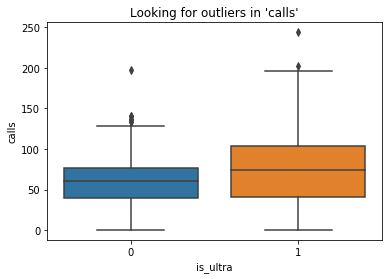

In [13]:
# draw a boxplot with 'is_ultra' and 'calls'
sns.boxplot(x="is_ultra", y="calls", data=df)
plt.title("Looking for outliers in 'calls'");

In [14]:
# check the outliers for Smart
df[(df['is_ultra'] == 0) & (df['calls'] > 120)].sort_values(by='calls', ascending=False).head()

,calls,minutes,messages,mb_used,is_ultra
755,198.0,1390.22,64.0,20066.15,0
1181,141.0,1043.89,22.0,32651.11,0
2348,141.0,1102.88,50.0,16951.74,0
914,137.0,973.64,13.0,16015.97,0
1521,136.0,860.30,0.0,24299.12,0


In [15]:
# check the outliers for Ultra
df[(df['is_ultra'] == 1) & (df['calls'] > 190)].sort_values(by='calls', ascending=False).head()

,calls,minutes,messages,mb_used,is_ultra
2589,244.0,1632.06,39.0,9756.91,1
1142,203.0,1566.45,20.0,3059.86,1
171,196.0,1279.75,133.0,26927.87,1


* There is 1 Smart subscriber with an anomalously large number of calls. Exclude the data point where 'calls' = 198.
* There is 1 Ultra subscriber with an anomalously large number of calls. Exclude the data point where 'calls' = 244.

In [16]:
# exclude 'calls' more than 198
df2 = df[df['calls'] < 198]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3211 entries, 0 to 3213
Data columns (total 5 columns):
calls       3211 non-null float64
minutes     3211 non-null float64
messages    3211 non-null float64
mb_used     3211 non-null float64
is_ultra    3211 non-null int64
dtypes: float64(4), int64(1)
memory usage: 150.5 KB


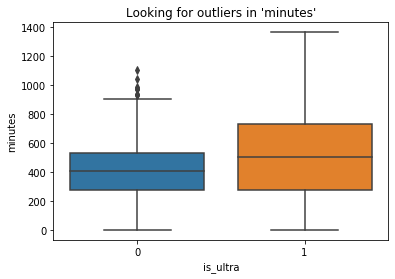

In [17]:
# draw a boxplot with 'is_ultra' and 'minutes'
sns.boxplot(x="is_ultra", y="minutes", data=df2)
plt.title("Looking for outliers in 'minutes'");

In [18]:
# check the outliers for Smart
df2[(df2['is_ultra'] == 0) & (df2['minutes'] > 900)].sort_values(by='minutes', ascending=False).head()

,calls,minutes,messages,mb_used,is_ultra
2348,141.0,1102.88,50.0,16951.74,0
1181,141.0,1043.89,22.0,32651.11,0
2794,128.0,989.90,6.0,24999.74,0
2342,127.0,974.19,48.0,17987.98,0
914,137.0,973.64,13.0,16015.97,0


* There is 1 Smart subscriber with an anomalously long call duration. Exclude the data point where 'minutes' = 1102.88. 

In [19]:
# exclude calls that are longer than 1102 minutes
df3 = df2[df2['minutes'] < 1102]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3173 entries, 0 to 3213
Data columns (total 5 columns):
calls       3173 non-null float64
minutes     3173 non-null float64
messages    3173 non-null float64
mb_used     3173 non-null float64
is_ultra    3173 non-null int64
dtypes: float64(4), int64(1)
memory usage: 148.7 KB


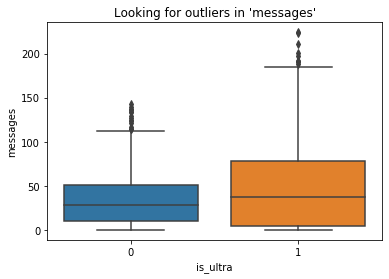

In [20]:
# draw a boxplot with 'is_ultra' and 'messages'
sns.boxplot(x="is_ultra", y="messages", data=df3)
plt.title("Looking for outliers in 'messages'");

In [21]:
# check the outliers for Smart
df3[(df3['is_ultra'] == 0) & (df3['messages'] > 100)].sort_values(by='messages', ascending=False).head()

,calls,minutes,messages,mb_used,is_ultra
2636,75.0,530.55,143.0,21653.39,0
2594,117.0,814.78,139.0,26891.98,0
2468,97.0,696.80,137.0,20085.31,0
2805,107.0,697.79,136.0,23537.37,0
2107,104.0,754.05,134.0,23558.34,0


In [22]:
# check the outliers for Ultra
df3[(df3['is_ultra'] == 1) & (df3['messages'] > 200)].sort_values(by='messages', ascending=False).head()

,calls,minutes,messages,mb_used,is_ultra
1546,37.0,266.45,224.0,31942.40,1
2088,138.0,933.86,223.0,22499.79,1
1649,0.0,0.00,211.0,27695.86,1
1103,0.0,0.00,201.0,27825.95,1


There are no dramatic outliers. Leaving all the data points in. 

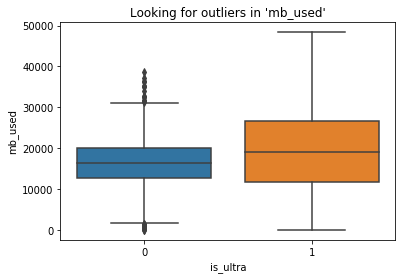

In [23]:
# draw a boxplot with 'is_ultra' and 'mb_used'
sns.boxplot(x="is_ultra", y="mb_used", data=df3)
plt.title("Looking for outliers in 'mb_used'");

Something is odd. The Smart subscribers' boxplot shows some data points below 'mb_used' = 0. The minimum value in the descriptive statistics was 0. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Huh, that's weird, must be some artifact of plotting
  
</div>

In [24]:
# check the outliers for Smart
df3[(df3['is_ultra'] == 0) & (df3['mb_used'] < 0)]

,calls,minutes,messages,mb_used,is_ultra


* There are no data points carrying negative 'mb_used' values. 
* There are no dramatic outliers. Leaving all the data points in. 

* **Class imbalance**

In [25]:
# count the total number of rows after the removal of all the outliers
print(df3.shape[0])

# check whether we have a class imbalance
df3['is_ultra'].value_counts(normalize=True)

3173


0    0.701859
1    0.298141
Name: is_ultra, dtype: float64

Total number of subscribers in the dataset = 3173, which constitutes of: 
<br>o 70.19% Smart subscribers
<br>o 29.81% Ultra subscribers 

We have two classes, Smart and Ultra, in a ratio of 2.33:1, causing a class imbalance where the classes are not represented equally. 

The ratio may be a property of the problem domain, that Megaline customers indeed prefer the Smart plan over the Ultra plan. Nevertheless, the skewed class distribution will affect the learning of our models. 

Depending on our approach, we will need to choose performance metrics other than accuracy since judging our model quality in terms of accuracy will be misleading. 70% of the observations in the dataset are Smart subscribers. Our model will learn during training that the best thing to do is to predict Smart twice as many times. Our model will then be overfit to Smart. The "accuracy" metric will then not reflect the model's performance but rather the underlying class proportion. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Yes, that's a very good point! You are absolutely correct, that accuracy is a poor choice of metric for imbalanced data, because the dumb constant model always predicting the majority class gets 70% accuracy for free. Dealing with this problem is the subject of the next project :)
  
</div>

* **Correlation and class distribution in the features**

Let us get a rough idea of the relationships between the features and how the two classes are distributed in them. 

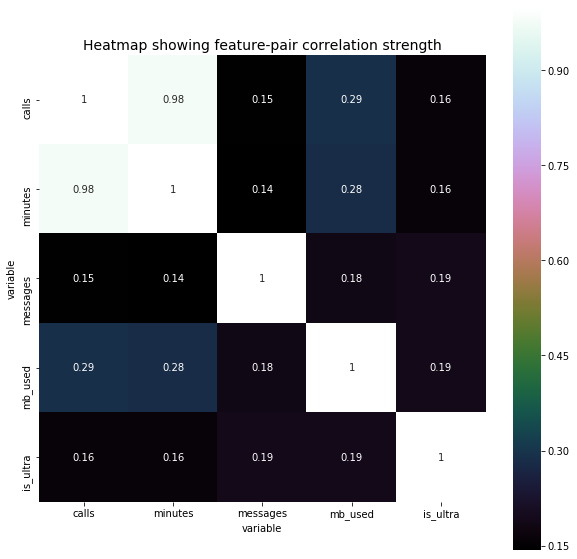

In [26]:
# draw up an inter-feature correlation heatmap
correlation = df3.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title("Heatmap showing feature-pair correlation strength", fontsize=14)
plt.ylabel("variable")
plt.xlabel("variable");

* There is no one particular feature that is strongly correlated to 'is_ultra'. 
* 'messages' and 'mb_used' are slightly more correlated to 'is_ultra' than 'calls' and 'minutes' are. 
* The following feature-pairs are most strongly correlated to each other in the order of strength: 1) 'calls' and 'minutes', 2) 'calls' and mb_used', and 3) 'minutes' and 'mb_used'. 


<br>Let us take a look at these feature-pair correlations in a scatter plot.

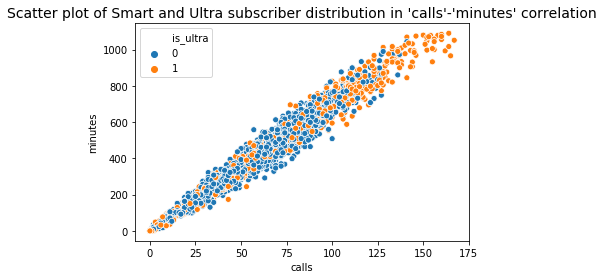

In [27]:
# draw a scatter plot with 'calls' and 'minutes' and they are distribute in the two plans
sns.scatterplot(data=df3, x="calls", y="minutes", hue='is_ultra')
plt.title("Scatter plot of Smart and Ultra subscriber distribution in 'calls'-'minutes' correlation", fontsize=14);

* Smart subscribers tend to be in the middle area of the plot (calls: 12-100, minutes: 100-700).
* Ultra subscribers are more likely to be found on either ends of the plot (calls: below 12 and above 100, minutes: below 100 and above 800).

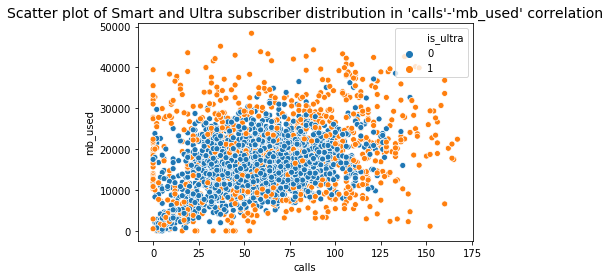

In [28]:
# draw a scatter plot with 'calls' and 'mb_used' and they are distribute in the two plans
sns.scatterplot(data=df3, x="calls", y="mb_used", hue='is_ultra')
plt.title("Scatter plot of Smart and Ultra subscriber distribution in 'calls'-'mb_used' correlation", fontsize=14);

* Again, Smart subscribers tend to be in the middle area of the plot (calls: 25-100, mb_used: 500-30000).
* Ultra subscribers are more likely to be found above and around the middle area of the plot: (calls: below 25 and above 100, mb_used: below 500 and above 30000). 

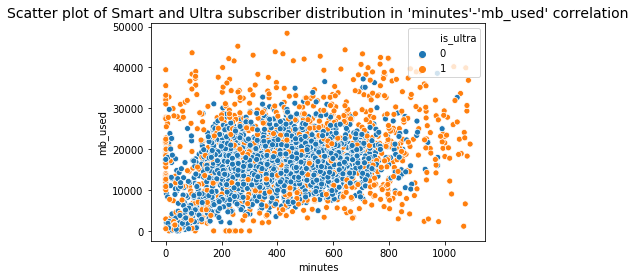

In [29]:
# draw a scatter plot with 'minutes' and 'mb_used' and they are distribute in the two plans
sns.scatterplot(data=df3, x="minutes", y="mb_used", hue='is_ultra')
plt.title("Scatter plot of Smart and Ultra subscriber distribution in 'minutes'-'mb_used' correlation", fontsize=14);

* Again, Smart subscribers tend to be in the middle area of the plot (minutes: 50-700, mb_used: 0-25000).
* Ultra subscribers are more likely to be found above and around the middle area of the plot (calls: below 50 and above 700, mb_used: 0-above 25000). 

## Conclusion <a class="anchor" id="section_1_4"></a>

[Go back to the Table of Contents](#table_of_contents)

* No complete duplicates
* No missing values
* Removed abnormally large values as outliers from 'calls' and 'minutes' features to make it easier for the models to learn the general property of the dataset. 
* The 'is_ultra' is our target and the rest are features. 
* The dataset exhibits a slight class imbalance of 2.33:1 in the Smart to Ultra subscriber ratio. 
* There is no one particular feature that is strongly correlated to 'is_ultra'. 'messages' and 'mb_used' are slightly more correlated to 'is_ultra' than 'calls' and 'minutes' are.
* 1) 'calls' and 'minutes', 2) 'calls' and mb_used', and 3) 'minutes' and 'mb_used' are the most strongly correlated feature-pairs.
* There are no variables that are irrelevant to the learning process. All will be used as features (except 'is_ultra' which will be the target, of course).

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Excellent EDA! You analyzed the data very thoroughly and made some great observations!
  
</div>

## Code Arsenal <a class="anchor" id="section_1_5"></a>

[Go back to the Table of Contents](#table_of_contents)

In [30]:
# write a function that takes the source dataset and the name of the target variable, and
# splits into training, validation and test datasets in the specified proportions
def separate_vars(source, target_col, train_portion, valid_portion, test_portion):
    # first split the source dataset into a training dataset and the "rest"
    df_train, df_valid_test = train_test_split(source, train_size=train_portion, random_state=12345)
    # then the "rest" into validation and test datasets
    df_valid, df_test = train_test_split(df_valid_test, train_size=valid_portion, test_size=test_portion, random_state=12345) 
    
    # in the training dataset, separate the variables into features and target
    features_train = df_train.drop(columns=target_col, axis=1)
    target_train = df_train[target_col]

    # in the validation dataset, separate the variables into features and target
    features_valid = df_valid.drop(columns=target_col, axis=1)
    target_valid = df_valid[target_col]
    
    # in the test dataset, separate the variables into features and target
    features_test = df_test.drop(columns=target_col, axis=1)
    target_test = df_test[target_col]
    
    # return all the datasets
    return features_train, target_train, features_valid, target_valid, features_test, target_test

In [158]:
# write a function that takes a model, a features dataset and a target dataset, and returns the ROC-AUC score
def calculate_roc_auc(model, f_set, t_set):
    pred_probas = model.predict_proba(f_set) 
    model_roc_auc_score = roc_auc_score(t_set, pred_probas[:, 1])
    return model_roc_auc_score

# Step 5. Additional task: sanity check the model <a class="anchor" id="chapter2"></a>

[Go back to the Table of Contents](#table_of_contents)

**Sanity Check against chance**
<br>This is a binary classification problem where a Megaline customer is using either a Smart or a Ultra plan. If the dataset were to contain an equal number of observations from the two classes (Smart and Ultra), then there will be a 50/50 chance of "guessing" the correct class of an observation, i.e. 0.5. 


**The best constant model**
<br>A dummy classifier is a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. It is used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset.

Although we have an imbalanced dataset, and therefore it is tempting to set the strategy parameter to 'stratified' to generate predictions by respecting the training set’s class distribution, let us set the parameter to 'most_frequent' which always predicts the most frequent label in the training set and raise the hurdle.

In [33]:
# prepare the training datasets from the raw dataset
train_segment2 = 0.6 # 1-0.6=0.4 is set aside for validation and test datasets combined
valid_segment2 = 0.5 # then split 50/50 the remaining 0.4 into validation and test datasets
test_segment2 = 0.5
features_train2, target_train2, features_valid2, target_valid2, features_test2, target_test2 = \
    separate_vars(df3, 'is_ultra', train_segment2, valid_segment2, test_segment2)

# look at the sizes
print('training dataset:', features_train2.shape[0], 'observations')
print('validation dataset:', features_valid2.shape[0], 'observations')
print('test dataset:', features_test2.shape[0], 'observations')

# make sure it all adds up to the correct total
print('raw data size:', df3.shape[0])
print('datasets size total:', features_train2.shape[0]+features_valid2.shape[0]+features_test2.shape[0])

training dataset: 1903 observations
validation dataset: 635 observations
test dataset: 635 observations
raw data size: 3173
datasets size total: 3173


<div class="alert alert-success">
<b>Reviewer's comment</b>
  
The data was split into train, validation and test. The proportions are reasonable
    
</div>

In [34]:
# create and train the model using the training dataset 
dummyclassifier_model2 = DummyClassifier(strategy='most_frequent', random_state=12345) 

# train the model
dummyclassifier_model2.fit(features_train2, target_train2)
        
# evaluate the accuracy of the trained model's performance on the validation dataset
print('training accuracy score:', dummyclassifier_model2.score(features_valid2, target_valid2))

training accuracy score: 0.7039370078740157


All the models are expected to score 0.70 at the least. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
Yep, that is a good baseline in this case! It's important to have a baseline to check that the models learn something non-trivial.
  
</div>

# Steps 2+3+4. Create and train models, and evaluate the performance <a class="anchor" id="chapter3"></a>

[Go back to the Table of Contents](#table_of_contents)

We have a binary classification problem of a recommendation kind. Let us try several approaches that take into account the class imbalance we have at hand.


**Approaches**

1) Resampling the dataset
<br>Make a dataset where the class proportion is equal. 

Granted the size of the dataset is small (3173 observations) and the dataset in the project would be considered as suffering from only a "slight imbalance" by the industry standard, but let us equalise the class proportion. We will achieve this by decreasing the over-represented 'Smart' class rather than supplementing the under-represented 'Ultra' class by adding synthetically-generated "fabricated" data. To introduce the element of pseudorandomness as much as possible, we will sample rows out of the dataset instead of taking the first X rows. 

We will create and compare the performance of the following models after having trained them on the dataset that contains an equal number of Smart and Ultra subscribers:

1.1) Decision tree binary classifier

1.2) Random forest binary classifier

1.3) Logistic regression classifier

The quality of the model's performance will be assessed in the confusion matrix, accuracy, precision, recall and F1 score. 



<br>2) Using the raw dataset
<br>The more data we have for training, the better. Let us see how the following models will fare with the raw dataset complete with its class imbalance. We will place some countermeasures for handling the class imbalance.

2.1) Decision tree binary classifier

2.2) Random forest binary classifier

2.3) Logistic regression classifier

The quality of the model's performance will again be assessed in the confusion matrix, accuracy, precision, recall, F1 score and ROC-AUC Curves.

## Resampling the dataset <a class="anchor" id="section_3_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [27]:
# create a data slice only with the Ultra subscribers
#ultra = df3[df3['is_ultra'] == 1]

# find the numbers of Ultra subscribers
#print('number of Ultra subscribers:', ultra.shape[0])

# randomly sample the same number of Smart subscribers as there are Ultra subscribers
#smart = df3[df3['is_ultra'] == 0].sample(946)
#print('number of Smart subscribers:', smart.shape[0])

# combine the two data slices into a single dataset
#resampled_df = ultra.append(smart, ignore_index=True)
#print('size of resampled dataset:', resampled_df.shape[0], 'observations')

number of Ultra subscribers: 946
number of Smart subscribers: 946
size of resampled dataset: 1892 observations


In [28]:
# prepare the training datasets from the resampled dataset
#train_segment1 = 0.6 # 1-0.6=0.4 is set aside for validation and test datasets combined
#valid_segment1 = 0.5 # then split 50/50 the remaining 0.4 into validation and test datasets
#test_segment1 = 0.5
#features_train1, target_train1, features_valid1, target_valid1, features_test1, target_test1 = \
    separate_vars(resampled_df, 'is_ultra', train_segment1, valid_segment1, test_segment1)

# look at the sizes
#print('training dataset:', features_train1.shape[0], 'observations')
#print('validation dataset:', features_valid1.shape[0], 'observations')
#print('test dataset:', features_test1.shape[0], 'observations')

training dataset: 1135 observations
validation dataset: 378 observations
test dataset: 379 observations


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
  
Very good, downsampling the majority class is one of the legitimate approaches to dealing with class imbalance! A couple of problems here though:
    
1. The way you applied it is problematic: downsampling should only be applied to the train set, otherwise you're getting a distorted view of the model's generalization perfomance (i.e. what the metric would like if the data in the real life was balanced; but the new data will not be balanced when you deploy the model!). In general, no transformations that depend on knowing the target should ever be applied to the validation/test set.
2. Another point is that you're doing a different split for the downsampled data. So then the test sets are different, and the scores on the different test sets are not really comparable.

By the way, the next project is basically dedicated to trying out different strategies of dealing with class imbalance and it's not required in this project, so you can just drop the parts with downsampling for now, and explore this ideas further in the next sprint. It's really cool that you came up with it earlier though! :)
  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
Very good! Problem fixed
  
</div>

**Another try at downsampling using the Near-Miss technique**

The raw data have already been split into train, validation and test datasets in section #4 above. So take only the train dataset segments (features_train2 and target_train2) to perform downsampling. 

We will use version 3 of the Near-Miss method implemented in the NearMiss imbalanced-learn class. This version of the method will select the majority 'Smart' class data points with minimum distance to each minority 'Ultra' class data point. It seemed most appropriate since it will only keep those majority class data points that are on the decision boundary.

Let us set n_neighbors_ver3=3, i.e. each example in the minority 'Ultra' class that is in the region of overlap with the majority 'Smart' class has up to three neighbors from the majority class.

In [63]:
# downsample the train dataset only
downsample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
features_train2_down, target_train2_down = downsample.fit_resample(features_train2, target_train2)

# look at the sizes
print('downsampled train dataset:', features_train2_down.shape[0], 'observations')

downsampled train dataset: 1126 observations


In [70]:
# check the ratio of Smart to Ultra subscribers before downsampling
target_train2_series = pd.Series(target_train2)
b4_downsampling_df = pd.merge(features_train2, target_train2_series,  left_index=True, right_index=True)
print('number of Smart subscribers before downsampling:', b4_downsampling_df[b4_downsampling_df['is_ultra'] == 0].shape[0])
print('number of Ultra subscribers before downsampling:', b4_downsampling_df[b4_downsampling_df['is_ultra'] == 1].shape[0])

number of Smart subscribers before downsampling: 1340
number of Ultra subscribers before downsampling: 563


In [71]:
# check the ratio of Smart to Ultra subscribers after downsampling
target_train2_down_series = pd.Series(target_train2_down)
downsampled_df = pd.merge(features_train2_down, target_train2_down_series,  left_index=True, right_index=True)
print('number of Smart subscribers after downsampling:', downsampled_df[downsampled_df['is_ultra'] == 0].shape[0])
print('number of Ultra subscribers after downsampling:', downsampled_df[downsampled_df['is_ultra'] == 1].shape[0])

number of Smart subscribers after downsampling: 563
number of Ultra subscribers after downsampling: 563


There is an equal proportion of Smart and Ultra subscribers in the downsampled train datasets. 


Let us visualise the new class distribution after downsampling.

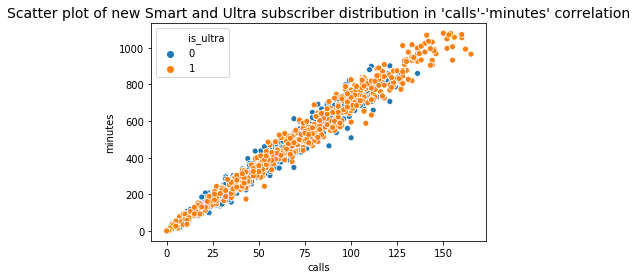

In [72]:
# draw a scatter plot with 'calls' and 'minutes' and they are distribute in the two plans
sns.scatterplot(data=downsampled_df, x="calls", y="minutes", hue='is_ultra')
plt.title("Scatter plot of new Smart and Ultra subscriber distribution in 'calls'-'minutes' correlation", fontsize=14);

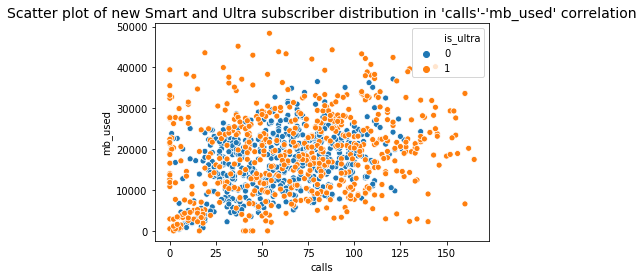

In [74]:
# draw a scatter plot with 'calls' and 'mb_used' and they are distribute in the two plans
sns.scatterplot(data=downsampled_df, x="calls", y="mb_used", hue='is_ultra')
plt.title("Scatter plot of new Smart and Ultra subscriber distribution in 'calls'-'mb_used' correlation", fontsize=14);

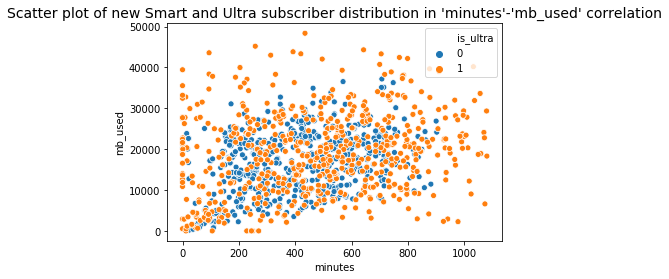

In [75]:
# draw a scatter plot with 'minutes' and 'mb_used' and they are distribute in the two plans
sns.scatterplot(data=downsampled_df, x="minutes", y="mb_used", hue='is_ultra')
plt.title("Scatter plot of new Smart and Ultra subscriber distribution in 'minutes'-'mb_used' correlation", fontsize=14);

* In the 'calls'-'minutes' scatter plot, the orange 'Ultra' data points are much more prominent than in the scatter plot plotted prior to downsampling. 
* We can see more clearly that the data points have evened out between the two classes in the 'calls'-'mb_used' and 'minutes'-'mb_used' scatter plots. 

### Decision tree binary classification <a class="anchor" id="section_3_1_1"></a>

[Go back to the Table of Contents](#table_of_contents)

max_depth = 1 , training accuracy score: 0.588809946714032 , validation accuracy score: 0.7275590551181103
max_depth = 2 , training accuracy score: 0.6456483126110124 , validation accuracy score: 0.7653543307086614
max_depth = 3 , training accuracy score: 0.6731793960923623 , validation accuracy score: 0.7858267716535433
max_depth = 4 , training accuracy score: 0.7007104795737122 , validation accuracy score: 0.7637795275590551
max_depth = 5 , training accuracy score: 0.7104795737122558 , validation accuracy score: 0.768503937007874
max_depth = 6 , training accuracy score: 0.7335701598579041 , validation accuracy score: 0.7763779527559055
max_depth = 7 , training accuracy score: 0.7548845470692718 , validation accuracy score: 0.7338582677165354
max_depth = 8 , training accuracy score: 0.7682060390763765 , validation accuracy score: 0.7448818897637796
max_depth = 9 , training accuracy score: 0.7939609236234458 , validation accuracy score: 0.7622047244094489
max_depth = 10 , training accu

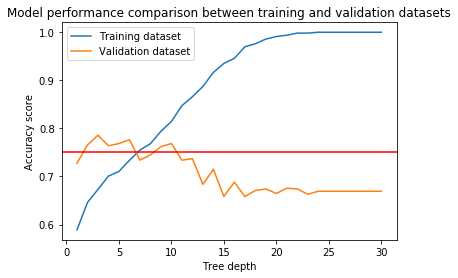

In [77]:
# find a ballpark depth value
max_depths = []
accuracy_train = []
accuracy_valid = []

for depth in range(1, 31): 
        # create a model, specifying max_depth
        decisiontree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 

        # train the model
        #decisiontree_model.fit(features_train1, target_train1)
        decisiontree_model.fit(features_train2_down, target_train2_down)

        # iterate to spot the best performing depth value on the test dataset
        #score_train = decisiontree_model.score(features_train1, target_train1)
        #score_valid = decisiontree_model.score(features_valid1, target_valid1)
        score_train = decisiontree_model.score(features_train2_down, target_train2_down)
        score_valid = decisiontree_model.score(features_valid2, target_valid2)
        max_depths.append(depth)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)
        
        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("max_depth =", depth, ", ", end='')
        print('training accuracy score:', score_train, ', validation accuracy score:', score_valid)

# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(max_depths, accuracy_train, label='Training dataset')
plt.plot(max_depths, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Tree depth")
plt.show()

At one point, the model produced the following output:


![Model qualities with training and validation datasets (scores)](attempt1_scores2.PNG "Model qualities with training and validation datasets (scores)")

![Model qualities with training and validation datasets (graph)](attempt1_graph2.PNG "Model qualities with training and validation datasets (graph)")

Note: the red line marks the project threshold score of 0.75. 


* The model overfits to the training dataset after max_depth=24. 
* The best accuracy score with the validation dataset peaks at 0.785 with max_depth=3, then basically deteriorates and plateaus thereafter. 


<br>Let us focus on the result with max_depth=3, calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved.

**Attempt #1**

In [116]:
# create a model, implicitly using the defaultive splitter='best'
decisiontree_model1 = DecisionTreeClassifier(random_state=12345, max_depth=6, criterion='gini') # 'gini' is better; # default setting of max_features, max_leaf_nodes is better

# train the model
#decisiontree_model1.fit(features_train1, target_train1)
decisiontree_model1.fit(features_train2_down, target_train2_down)
        
# find the predictions using validation set
decisiontree_predictions_valid2 = decisiontree_model1.predict(features_valid2) 
decisiontree_probas_valid2 = decisiontree_model1.predict_proba(features_valid2) 
        
# evaluate the performance quality of the trained model on the validation dataset
# print out the confusion matrix, precision, recall and F1 score
print(confusion_matrix(target_valid2, decisiontree_predictions_valid2))
print(classification_report(target_valid2, decisiontree_predictions_valid2))

# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
decisiontree1_roc_auc = roc_auc_score(target_valid2, decisiontree_probas_valid2[:, 1])
print('roc-auc score:', decisiontree1_roc_auc)

[[401  46]
 [ 96  92]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       447
           1       0.67      0.49      0.56       188

    accuracy                           0.78       635
   macro avg       0.74      0.69      0.71       635
weighted avg       0.77      0.78      0.77       635

roc-auc score: 0.6999559712504165


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
  
Here (and throughout the project) ROC-AUC is calculated incorrectly: method `predict` of the models generates binary predictions, but for ROC-AUC, we need probability values (method `predict_proba`), because the ROC curve is generated by varying the threshold of assigning prediction of positive class from 0 to 1.
  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
Great, now it's correct!
  
</div>

At one point, the model produced the following output:

![Model performance scores with validation dataset after fine-tuning](attempt1_scores_finetuned2.PNG "Model performance scores with validation dataset after fine-tuning")


* The model was found to perform Ultra subscriber classification slightly better at max_depth=6 than max_depth=3 or any other depth values tried.
* In 401 out of 447 cases, the model classified Smart subscribers correctly (recall=0.90). In 92 out of 188 cases, the model classified Ultra subscribers correctly (recall=0.49). 
* In 401 out of 497 cases, the model classified Smart subscribers correctly (precision=0.81). In 92 out of 138 cases, the model classified Ultra subscribers correctly (precision=0.67). 
* With the overall accuracy of 0.70, the model quality is 0.05 short of the project threshold. At this depth value, the accuracy score is slightly lower than that of the basic constant model, but the model produces a higher score with different depth values so it seems to be inferring from the features. 
* Even if the model was trained on a dataset containing an equal proportion of Smart and Ultra subscriber observations, it seems to perform in favour of the Smart subscribers. 

### Random forest binary classification <a class="anchor" id="section_3_1_2"></a>

[Go back to the Table of Contents](#table_of_contents)

n_estimators = 1 , training accuracy score: 0.8658969804618117 , validation accuracy score: 0.6724409448818898
n_estimators = 2 , training accuracy score: 0.8605683836589698 , validation accuracy score: 0.7370078740157481
n_estimators = 3 , training accuracy score: 0.9369449378330373 , validation accuracy score: 0.6866141732283465
n_estimators = 4 , training accuracy score: 0.9342806394316163 , validation accuracy score: 0.7338582677165354
n_estimators = 5 , training accuracy score: 0.9644760213143873 , validation accuracy score: 0.6897637795275591
n_estimators = 6 , training accuracy score: 0.9618117229129662 , validation accuracy score: 0.7228346456692913
n_estimators = 7 , training accuracy score: 0.9769094138543517 , validation accuracy score: 0.705511811023622
n_estimators = 8 , training accuracy score: 0.9706927175843695 , validation accuracy score: 0.7307086614173228
n_estimators = 9 , training accuracy score: 0.9822380106571936 , validation accuracy score: 0.7291338582677165
n_

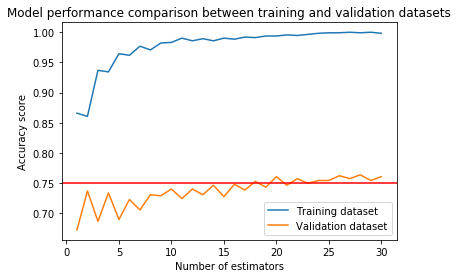

In [122]:
# find a ballpark number of estimators
num_estimators = []
accuracy_train = []
accuracy_valid = []

for n_estimates in range(1, 31):
        # create a model, specifying n_estimators
        randomforest_model = RandomForestClassifier(random_state=12345, n_estimators=n_estimates) 

        # train the model 
        #randomforest_model.fit(features_train1, target_train1) 
        randomforest_model.fit(features_train2_down, target_train2_down) 

        # iterate to spot the best performing depth value on the test dataset
        #score_train = randomforest_model.score(features_train1, target_train1)
        #score_valid = randomforest_model.score(features_valid1, target_valid1)
        score_train = randomforest_model.score(features_train2_down, target_train2_down)
        score_valid = randomforest_model.score(features_valid2, target_valid2)
        num_estimators.append(n_estimates)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)
        
        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("n_estimators =", n_estimates, ", ", end='')
        print('training accuracy score:', score_train, ', validation accuracy score:', score_valid)
        
# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(num_estimators, accuracy_train, label='Training dataset')
plt.plot(num_estimators, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Number of estimators")
plt.show()

At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt2_scores2.PNG "Model qualities with training and validation datasets (scores)")

![Model qualities with training and validation datasets (graph)](attempt2_graph2.PNG "Model qualities with training and validation datasets (graph)")

Note: the red line marks the project threshold score of 0.75. 


* The model starts overfitting to the training dataset after n_estimators=27.
* The best accuracy score with the validation dataset peaks at 0.764 with n_estimators=28, then basically plateaus thereafter.

<br>Let us focus on the result with n_estimators=28, calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved.

**Attempt #2**

In [128]:
# create a model
randomforest_model1 = RandomForestClassifier(random_state=12345, n_estimators=28, criterion='gini') # 'gini' is better; better not to touch max_depth, 

# train the model 
randomforest_model1.fit(features_train2_down, target_train2_down) 
        
# find the predictions using validation set
randomforest_predictions_valid2 = randomforest_model1.predict(features_valid2) 
randomforest_probas_valid1 = randomforest_model1.predict_proba(features_valid2) 
        
# evaluate the performance quality of the trained model on the validation dataset
# print out the confusion matrix, precision, recall and F1 score
print(confusion_matrix(target_valid2, randomforest_predictions_valid2))
print(classification_report(target_valid2, randomforest_predictions_valid2))
        
# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
randomforest1_roc_auc = roc_auc_score(target_valid2, randomforest_probas_valid1[:, 1])
print('roc-auc score:', randomforest1_roc_auc)

[[358  89]
 [ 61 127]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       447
           1       0.59      0.68      0.63       188

    accuracy                           0.76       635
   macro avg       0.72      0.74      0.73       635
weighted avg       0.78      0.76      0.77       635

roc-auc score: 0.7701818268361179


At one point, the model produced the following output:

![Model performance scores with validation dataset after fine-tuning](attempt2_scores_finetuned2.PNG "Model performance scores with validation dataset after fine-tuning")


* Compared to the performance of the decision tree classifier, the overall ROC-AUC score is up 0.07, though the accuracy went down by 0.02.
* For Ultra subscriber observations, the precision took a fall by 0.08 and the recall rose by 0.19. 
* The model performed better at classifying the Ultra subscriber observations than the decision tree model.  

### Logistic regression <a class="anchor" id="section_3_1_3"></a>

[Go back to the Table of Contents](#table_of_contents)

**Attempt #3**

In [134]:
# create and train the model using the training dataset and fine-tune the hyperparameters
# which is said to be most suited to binary classification problems
logisticregression_model = LogisticRegression(random_state=12345, solver='newton-cg') # 'newton-cg' solver is slightly better than 'liblinear'

# train the model 
logisticregression_model.fit(features_train2_down, target_train2_down) 
        
# find the predictions using validation set
logisticregression_predictions_valid = logisticregression_model.predict(features_valid2) 
logisticregression_probas_valid = logisticregression_model.predict_proba(features_valid2) 

# evaluate the performance quality of the trained model on the validation dataset
# print out the confusion matrix, precision, recall and F1 score
print(confusion_matrix(target_valid2, logisticregression_predictions_valid))
print(classification_report(target_valid2, logisticregression_predictions_valid))

# calculate the AUC evaluation metric
logisticregression_roc_auc = roc_auc_score(target_valid2, logisticregression_probas_valid[:, 1])
print('roc auc score:', logisticregression_roc_auc)

[[291 156]
 [ 75 113]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       447
           1       0.42      0.60      0.49       188

    accuracy                           0.64       635
   macro avg       0.61      0.63      0.61       635
weighted avg       0.68      0.64      0.65       635

roc auc score: 0.6680946261126185


At one point, the model produced the following output:


![Model performance scores with validation dataset after fine-tuning](attempt3_scores_finetuned2.PNG "Model performance scores with validation dataset after fine-tuning")

* The model performs better than the decision tree classifier and worse than the random forest classifier. 
* penalty='l2', fit_intercept=True have no effect whatsoever on the model's performance. 

### Conclusion <a class="anchor" id="section_3_1_4"></a>

[Go back to the Table of Contents](#table_of_contents)

Using a dataset with an equal proportion of Smart and Ultra subscribers did not help train an accurate model. 

So far, attempt #2 (a random forest classifier with n_estimators=28, criterion='gini') has shown the best performance. 

Our quest for the Megaline subscription plan recommender continues.

## Using the raw dataset <a class="anchor" id="section_3_2"></a>

[Go back to the Table of Contents](#table_of_contents)

More training data, the merrier. We will our the experiments using the whole dataset but taking the class imbalance into account. 

### Decision tree binary classification <a class="anchor" id="section_3_2_1"></a>

[Go back to the Table of Contents](#table_of_contents)

max_depth = 1 , training accuracy score: 0.7551234892275355 validation accuracy score: 0.7669291338582677
max_depth = 2 , training accuracy score: 0.7840252233315818 validation accuracy score: 0.768503937007874
max_depth = 3 , training accuracy score: 0.7961114030478192 validation accuracy score: 0.7889763779527559
max_depth = 4 , training accuracy score: 0.7693116132422491 validation accuracy score: 0.7448818897637796
max_depth = 5 , training accuracy score: 0.8060956384655806 validation accuracy score: 0.7779527559055118
max_depth = 6 , training accuracy score: 0.7808723068838676 validation accuracy score: 0.7181102362204724
max_depth = 7 , training accuracy score: 0.8039936941671045 validation accuracy score: 0.7307086614173228
max_depth = 8 , training accuracy score: 0.8407777193904361 validation accuracy score: 0.7370078740157481
max_depth = 9 , training accuracy score: 0.8617971623751971 validation accuracy score: 0.7511811023622047
max_depth = 10 , training accuracy score: 0.877

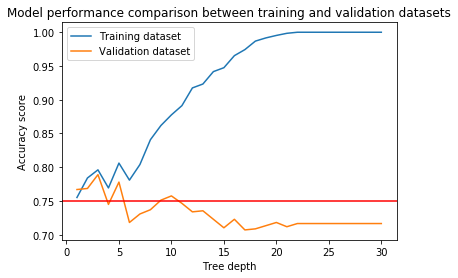

In [136]:
# find a ballpark depth value
max_depths = []
accuracy_train = []
accuracy_valid = []

for depth in range(1, 31): 
        # create a model, specifying max_depth
        decisiontree_model2 = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight={0:0.3, 1:0.7}, criterion='gini') 

        # train the model
        decisiontree_model2.fit(features_train2, target_train2)

        # iterate to spot the best performing depth value on the test dataset
        score_train = decisiontree_model2.score(features_train2, target_train2)
        score_valid = decisiontree_model2.score(features_valid2, target_valid2)
        max_depths.append(depth)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)

        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("max_depth =", depth, ", ", end='')
        print('training accuracy score:', score_train, 'validation accuracy score:', score_valid)
          
# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(max_depths, accuracy_train, label='Training dataset')
plt.plot(max_depths, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Tree depth")
plt.show()

At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt4_scores.PNG "Model qualities with training and validation datasets (scores)")

![Model qualities with training and validation datasets (graph)](attempt4_graph.PNG "Model qualities with training and validation datasets (graph)")

Note: the red line marks the project threshold score of 0.75. 


* The model overfits to the training dataset after max_depth=22. 
* The best accuracy score with the validation dataset peaks at 0.789 with max_depth=3, exceeding the project threshold, then deteriorates and plateaus thereafter. 


<br>Let us focus on the result with max_depth=3, calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved. 

**Attemp #4**

In [137]:
# create a model, using the default setting of splitter='best'
decisiontree_model3 = DecisionTreeClassifier(criterion='gini', random_state=12345, max_depth=5, class_weight={0:0.3, 1:0.7}) 

# train the model
decisiontree_model3.fit(features_train2, target_train2)
     
# find the predictions using validation set
decisiontree_predictions_valid3 = decisiontree_model3.predict(features_valid2) 
decisiontree_probas_valid3 = decisiontree_model3.predict_proba(features_valid2) 

# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, decisiontree_predictions_valid3))
print(classification_report(target_valid2, decisiontree_predictions_valid3))
        
# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
decisiontree5_roc_auc = roc_auc_score(target_valid2, decisiontree_probas_valid3[:, 1])
print('roc auc score:', decisiontree5_roc_auc)

[[388  59]
 [ 82 106]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       447
           1       0.64      0.56      0.60       188

    accuracy                           0.78       635
   macro avg       0.73      0.72      0.72       635
weighted avg       0.77      0.78      0.77       635

roc auc score: 0.7333464229615878


At one point, the model produced the following output:


![Model qualities with training and validation datasets (scores)](attempt4_scores2.PNG "Model qualities with training and validation datasets (scores)")


* Switching the criterion between 'gini' and 'entropy' has no effect on the model's performance. 
* The F1 score is good for Smart subscribers as expected since they are the 70% of the dataset. The F1 score for Ultra subscribers does not reach the project threshold of 0.75. 

<br>Let us see whether the GridSearchCV parameter can find an optimal combination of hyperparameters and help improve the model quality.

**Attempt #5**

In [138]:
# create an instance of the model
decisiontree_model4 = DecisionTreeClassifier(random_state=12345) 

# define the parameters to optimise
# not selecting all the hyperparameters due to processing power limitations and computation time
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [3, 4, 5, 6, 7, 8],
          'class_weight': [{0:0.3, 1:0.7}, {0:0.5, 1:0.5}, 'balanced', None],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'min_weight_fraction_leaf': [0, 0.3, 0.5, 0.7],
          'min_impurity_decrease': [0.0, 0.1, 0.2]}

decisiontree_cv = GridSearchCV(estimator=decisiontree_model4, param_grid=params, cv=3, verbose=1, n_jobs=-1)
decisiontree_cv.fit(features_train2, target_train2)
print(decisiontree_cv.best_params_)

Fitting 3 folds for each of 23040 candidates, totalling 69120 fits
{'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'entropy', 'max_depth': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}


It took about 8 minutes to execute GrtidSearchCV. 

In [139]:
# create a model with the suggested combination of the hyperparameters
decisiontree_model5 = DecisionTreeClassifier(random_state=12345, criterion='entropy', max_depth=7, class_weight={0:0.5, 1:0.5}, \
                                             min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, \
                                             min_weight_fraction_leaf=0, splitter='best') 

# train the model
decisiontree_model5.fit(features_train2, target_train2)
     
# find the predictions using validation set
decisiontree_predictions_valid5 = decisiontree_model5.predict(features_valid2) 
decisiontree_probas_valid5 = decisiontree_model5.predict_proba(features_valid2)

# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, decisiontree_predictions_valid5))
print(classification_report(target_valid2, decisiontree_predictions_valid5))
        
# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
decisiontree4_roc_auc = roc_auc_score(target_valid2, decisiontree_probas_valid5[:, 1])
print('roc auc score:', decisiontree4_roc_auc)

[[412  35]
 [ 98  90]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       447
           1       0.72      0.48      0.58       188

    accuracy                           0.79       635
   macro avg       0.76      0.70      0.72       635
weighted avg       0.78      0.79      0.78       635

roc auc score: 0.7277357323052025


At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt5_scores.PNG "Model qualities with training and validation datasets (scores)")

* It is interesting that the class imbalance does not seem to bother GridSearchCV - it suggests class_weight={0:0.5, 1:0.5}. 
* GridSearchCV's recommended combination of hyperparameters produces a worse result than the manually set combination in terms of the ROC-AUC score and F1 score for Ultra subscribers. 

### Random forest binary classification <a class="anchor" id="section_3_2_2"></a>

[Go back to the Table of Contents](#table_of_contents)

n_estimators = 1 , training accuracy score: 0.9085654230162901 validation accuracy score: 0.7181102362204724
n_estimators = 2 , training accuracy score: 0.9148712559117184 validation accuracy score: 0.7622047244094489
n_estimators = 3 , training accuracy score: 0.9527062532842879 validation accuracy score: 0.7669291338582677
n_estimators = 4 , training accuracy score: 0.9527062532842879 validation accuracy score: 0.7889763779527559
n_estimators = 5 , training accuracy score: 0.9700472937467157 validation accuracy score: 0.7763779527559055
n_estimators = 6 , training accuracy score: 0.9679453494482396 validation accuracy score: 0.7889763779527559
n_estimators = 7 , training accuracy score: 0.9805570152390962 validation accuracy score: 0.7889763779527559
n_estimators = 8 , training accuracy score: 0.977929584866001 validation accuracy score: 0.7905511811023622
n_estimators = 9 , training accuracy score: 0.9858118759852864 validation accuracy score: 0.7905511811023622
n_estimators = 10 , 

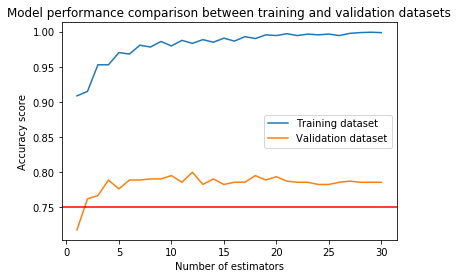

In [140]:
# find a ballpark number of estimators
num_estimators = []
accuracy_train = []
accuracy_valid = []

for n_estimates in range(1, 31):
        # create a model, specifying n_estimators
        randomforest_model3 = RandomForestClassifier(random_state=12345, n_estimators=n_estimates, class_weight={0:0.3, 1:0.7}) 

        # train the model 
        randomforest_model3.fit(features_train2, target_train2) 

        # iterate to spot the best performing depth value on the test dataset
        score_train = randomforest_model3.score(features_train2, target_train2)
        score_valid = randomforest_model3.score(features_valid2, target_valid2)
        num_estimators.append(n_estimates)
        accuracy_train.append(score_train)
        accuracy_valid.append(score_valid)
        
        # evaluate the accuracy of the trained model's performance on the validation dataset
        print("n_estimators =", n_estimates, ", ", end='')
        print('training accuracy score:', score_train, 'validation accuracy score:', score_valid)
        
# plot the accuracy scores of the model's performance on the training dataset and on the validation dataset
plt.plot(num_estimators, accuracy_train, label='Training dataset')
plt.plot(num_estimators, accuracy_valid, label='Validation dataset')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend()
plt.title("Model performance comparison between training and validation datasets")
plt.ylabel("Accuracy score")
plt.xlabel("Number of estimators")
plt.show()

At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt6_scores.PNG "Model qualities with training and validation datasets (scores)")

![Model qualities with training and validation datasets (graph)](attempt6_graph.PNG "Model qualities with training and validation datasets (graph)")


* The model overfits to the training dataset after 85 estimators. 
* The best accuracy score with the validation dataset peaks at 0.795 with 10 estimators, then basically plateaus. 


<br>Let us focus on the result with 10 estimators, calculate the evaluation metrics and experiment with the hyperparameters to see if the model performance can be improved. 

**Attempt #6**

In [141]:
# create a model, specifying n_estimators
randomforest_model4 = RandomForestClassifier(random_state=12345, n_estimators=12, class_weight={0:0.3, 1:0.7}) 

# train the model 
randomforest_model4.fit(features_train2, target_train2) 

# find the predictions using validation set
randomforest_predictions_valid4 = randomforest_model4.predict(features_valid2)         
randomforest_probas_valid4 = randomforest_model4.predict_proba(features_valid2)
    
# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, randomforest_predictions_valid4))
print(classification_report(target_valid2, randomforest_predictions_valid4))

# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
randomforest4_roc_auc = roc_auc_score(target_valid2, randomforest_probas_valid4[:, 1])
print('roc auc score:', randomforest4_roc_auc)

[[406  41]
 [ 86 102]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       447
           1       0.71      0.54      0.62       188

    accuracy                           0.80       635
   macro avg       0.77      0.73      0.74       635
weighted avg       0.79      0.80      0.79       635

roc auc score: 0.7685932219524966


At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt6_scores2.PNG "Model qualities with training and validation datasets (scores)")


* Compared to Attempt #2, the overall accuracy score is up 0.06 but the ROC AUC score is lower. 


<br>Let us see if the GridSearchCV parameter can find an optimal combination of hyperparameters and help improve the model quality.

**Attempt #7**

In [142]:
# create an instance of the model
randomforest_model5 = RandomForestClassifier(random_state=12345) 

# define the parameters to optimise
params = {'n_estimators': [8, 9, 10, 11, 12, 13, 14, 15],
          'max_depth' : [4,5,6,7,8],
          'criterion' :['gini', 'entropy'],
          'class_weight': [{0:0.3, 1:0.7}, {0:0.5, 1:0.5}, 'balanced', None],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5]
         }

randomforest_cv = GridSearchCV(estimator=randomforest_model5, param_grid=params, cv=3, verbose=1, n_jobs=-1)
randomforest_cv.fit(features_train2, target_train2)
print(randomforest_cv.best_params_)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits
{'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 8}


It took about 8 minutes to execute GridSearchCV.

In [144]:
# create a model with the suggested combination of the hyperparameters
randomforest_model6 = RandomForestClassifier(random_state=12345, n_estimators=8, max_depth=5, criterion='entropy', \
                                             class_weight={0: 0.5, 1: 0.5}, min_samples_leaf=1, min_samples_split=3)

# train the model 
randomforest_model6.fit(features_train2, target_train2) 

# find the predictions using validation set
randomforest_predictions_valid6 = randomforest_model6.predict(features_valid2)
randomforest_probas_valid6 = randomforest_model6.predict_proba(features_valid2)
    
# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, randomforest_predictions_valid6))
print(classification_report(target_valid2, randomforest_predictions_valid6))

# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
randomforest6_roc_auc = roc_auc_score(target_valid2, randomforest_probas_valid6[:, 1])
print('roc auc score:', randomforest6_roc_auc)

[[410  37]
 [ 95  93]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       447
           1       0.72      0.49      0.58       188

    accuracy                           0.79       635
   macro avg       0.76      0.71      0.72       635
weighted avg       0.78      0.79      0.78       635

roc auc score: 0.7704198200771097


At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt7_scores.PNG "Model qualities with training and validation datasets (scores)")


* Again, GridSearchCV is not bothered about the class imbalance - it is suggesting class_weight={0:0.5, 1:0.5}.
* The manually-found combination of hyperparameters showed a better performance. 
* The overall accuracy score passes the project threshold, but the ROC-AUC score is insufficient. 

### Logistic regression <a class="anchor" id="section_3_2_3"></a>

[Go back to the Table of Contents](#table_of_contents)

**Attempt #8**

In [145]:
# create and train the model using the training dataset with 'liblinear' solver
logisticregression_model2 = LogisticRegression(random_state=12345, solver='liblinear', class_weight={0:0.3, 1:0.7}) 

# train the model 
logisticregression_model2.fit(features_train2, target_train2) 

# find the predictions using validation set
logisticregression_predictions_valid2 = logisticregression_model2.predict(features_valid2)         
logisticregression_probas_valid2 = logisticregression_model2.predict_proba(features_valid2)

# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, logisticregression_predictions_valid2))
print(classification_report(target_valid2, logisticregression_predictions_valid2))

# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
logisticregression2_roc_auc = roc_auc_score(target_valid2, logisticregression_probas_valid2[:, 1])
print('roc auc score:', logisticregression2_roc_auc)

[[284 163]
 [ 72 116]]
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       447
           1       0.42      0.62      0.50       188

    accuracy                           0.63       635
   macro avg       0.61      0.63      0.60       635
weighted avg       0.68      0.63      0.65       635

roc auc score: 0.6762339949545433


At one point, the model produced the following output: 

![Model qualities with training and validation datasets (scores)](attempt8_scores.PNG "Model qualities with training and validation datasets (scores)")


This is the worst ever. 

<br>Let us see if the GridSearchCV parameter can find an optimal combination of hyperparameters and help improve the model quality.

**Attempt #9**

In [146]:
# create an instance of the model
logisticregression_model3 = LogisticRegression(random_state=12345) 

# define the parameters to optimise
params = { 
        'solver': ['liblinear', 'newton-cg', 'sag', 'lbfgs', 'saga'],
        'class_weight': [{0:0.3, 1:0.7}, {0:0.5, 1:0.5}, 'balanced', None],
        'penalty': ['l2', 'l1', 'elasticnet', 'none'],
        'C': [0.1, 0.5, 1.0],
        'fit_intercept': [True, False],
        'intercept_scaling': [0.0, 0.5, 1.0],
        'max_iter': [50, 100, 200],
        'multi_class': ['auto', 'ovr', 'multinomial']}

logisticregression_cv = GridSearchCV(estimator=logisticregression_model3, param_grid=params, cv=3, verbose=1, n_jobs=-1)
logisticregression_cv.fit(features_train2, target_train2)
print(logisticregression_cv.best_params_)

Fitting 3 folds for each of 12960 candidates, totalling 38880 fits
{'C': 0.1, 'class_weight': {0: 0.5, 1: 0.5}, 'fit_intercept': True, 'intercept_scaling': 0.0, 'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


It took about 15 minutes for GridSearchCV to run. 

In [147]:
# create and train the model
logisticregression_model4 = LogisticRegression(random_state=12345, solver='newton-cg', class_weight={0:0.5, 1:0.5}, penalty='l2', \
                                            C=0.1, fit_intercept=True, intercept_scaling=0.0, max_iter=50, multi_class='auto') 

# train the model 
logisticregression_model4.fit(features_train2, target_train2) 
        
# find the predictions using validation set
logisticregression_predictions_valid4 = logisticregression_model4.predict(features_valid2)         
logisticregression_probas_valid4 = logisticregression_model4.predict_proba(features_valid2)

# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, logisticregression_predictions_valid4))
print(classification_report(target_valid2, logisticregression_predictions_valid4))

# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
logisticregression4_roc_auc = roc_auc_score(target_valid2, logisticregression_probas_valid4[:, 1])
print('roc auc score:', logisticregression4_roc_auc)

[[441   6]
 [158  30]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.84       447
           1       0.83      0.16      0.27       188

    accuracy                           0.74       635
   macro avg       0.78      0.57      0.56       635
weighted avg       0.76      0.74      0.67       635

roc auc score: 0.6777333523727926


At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt9_scores.PNG "Model qualities with training and validation datasets (scores)")

* This is the worst ever set of scores. 
* Again, GridSearchCV is not concerned with the class imbalance and suggests class_weight={0:0.5, 1:0.5}.

### Bagging Classifier <a class="anchor" id="section_3_2_4"></a>

[Go back to the Table of Contents](#table_of_contents)

**Attempt #10**

In [149]:
# create a model, specifying n_estimators
bagging_model = BaggingClassifier(random_state=12345, base_estimator=RandomForestClassifier()) 

# train the model 
bagging_model.fit(features_train2, target_train2) 

# find the predictions using validation set
bagging_predictions_valid = bagging_model.predict(features_valid2)         
bagging_probas_valid = bagging_model.predict_proba(features_valid2) 
    
# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, bagging_predictions_valid))
print(classification_report(target_valid2, bagging_predictions_valid))

# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
bagging_model_roc_auc = roc_auc_score(target_valid2, bagging_probas_valid[:, 1])
print('roc auc score:', bagging_model_roc_auc)

[[403  44]
 [ 81 107]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       447
           1       0.71      0.57      0.63       188

    accuracy                           0.80       635
   macro avg       0.77      0.74      0.75       635
weighted avg       0.80      0.80      0.80       635

roc auc score: 0.7955935551430339


At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt10_scores.PNG "Model qualities with training and validation datasets (scores)")

* The accuracy score exceeds the project threshold but the ROC AUC score has a little more to go to satisfying the project threshold. 
* The F1 score has a little more work for Ultra subscribers.

### Easy Ensemble Classifier <a class="anchor" id="section_3_2_5"></a>

[Go back to the Table of Contents](#table_of_contents)

**Attempt #11**

In [150]:
# create a model, specifying n_estimators
easyensemble_model = EasyEnsembleClassifier(random_state=12345, base_estimator=RandomForestClassifier()) 

# train the model 
easyensemble_model.fit(features_train2, target_train2) 

# find the predictions using validation set
easyensemble_predictions_valid = easyensemble_model.predict(features_valid2)         
easyensemble_probas_valid = easyensemble_model.predict_proba(features_valid2)  
    
# print out the confusion matrix, precision, recall, F1 score and support
print(confusion_matrix(target_valid2, easyensemble_predictions_valid))
print(classification_report(target_valid2, easyensemble_predictions_valid))

# calculate the AUC (Area Under Curve) evaluation metric, which is said to be a good metric for binary classification problems
easyensemble_roc_auc = roc_auc_score(target_valid2, easyensemble_probas_valid[:, 1])
print('roc auc score:', easyensemble_roc_auc)

[[346 101]
 [ 58 130]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       447
           1       0.56      0.69      0.62       188

    accuracy                           0.75       635
   macro avg       0.71      0.73      0.72       635
weighted avg       0.77      0.75      0.76       635

roc auc score: 0.7910419344090628


At one point, the model produced the following output:

![Model qualities with training and validation datasets (scores)](attempt11_scores.PNG "Model qualities with training and validation datasets (scores)")

The accuracy score is bang on the project threshold but the ROC AUC score is not sufficiently high for the model to pass the criteria.

### Conclusion <a class="anchor" id="section_3_2_5"></a>

[Go back to the Table of Contents](#table_of_contents)

Training the models on a bigger dataset did help raise the scores in the evaluation metrics, but the Ultra subscribers are not being classified sufficiently accurately. 

# Overall Conclusion <a class="anchor" id="chapter4"></a>

[Go back to the Table of Contents](#table_of_contents)

Below is the results of testing the models with the validation dataset:

| 	Attempt	| 	Classifier	 | 	Hyperparameters	 | 	Dataset	 | 	Accuracy	 |	ROC-AUC	 |	Class	 |	F1 Score	 |
|----------		|----------		|----------		|----------		|----------		|----------		|----------		|----------		 | 
| 	1	| 	Decision Tree	 | 	max_depth=6, criterion='gini'	 | 	Undersampled	 | 	0.78	 |	0.7	 | 	Smart	 | 	0.85	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.56	 | 
| 	2	| 	Random Forest	 | 	n_estimators=28, criterion='gini'	 | 	Undersampled	 | 	0.76	 |	0.77	 | 	Smart	 | 	0.83	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.63	 | 
| 	3	| 	Logistic Regression	 | 	solver='newton-cg'	 | 	Undersampled	 | 	0.64	 |	0.67	 | 	Smart	 | 	0.72	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.49	 | 
| 	4	| 	Decision Tree	 | 	criterion='gini', max_depth=5, class_weight={0:0.3, 1:0.7}	 | 	Raw	 | 	0.78	 |	0.73	 | 	Smart	 | 	0.85	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.6	 | 
| 	5	| 	0	 | 	criterion='entropy', max_depth=7, class_weight={0:0.5, 1:0.5},  min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0, splitter='best'	 | 	Raw	 | 	0.79	 |	0.73	 | 	Smart	 | 	0.86	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.58	 | 
| 	6	| 	Random Forest	 | 	n_estimators=12, class_weight={0:0.3, 1:0.7}	 | 	Raw	 | 	0.8	 |	0.77	 | 	Smart	 | 	0.86	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.62	 | 
| 	7	| 	0	 | 	n_estimators=8, max_depth=5, criterion='entropy', class_weight={0: 0.5, 1: 0.5}, min_samples_leaf=1, min_samples_split=3	 | 	Raw	 | 	0.79	 |	0.77	 | 	Smart	 | 	0.86	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.58	 | 
| 	8	| 	Logistic Regression	 | 	solver='liblinear', class_weight={0:0.3, 1:0.7}	 | 	Raw	 | 	0.63	 |	0.68	 | 	Smart	 | 	0.71	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.5	 | 
| 	9	| 	0	 | 	solver='newton-cg', class_weight={0:0.5, 1:0.5}, penalty='l2', C=0.1, fit_intercept=True, intercept_scaling=0.0, max_iter=50, multi_class='auto'	 | 	Raw	 | 	0.74	 |	0.68	 | 	Smart	 | 	0.84	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.27	 | 
| 	10	| 	Bagging	 | 	base_estimator=RandomForestClassifier()	 | 	Raw	 | 	0.8	 |	0.8	 | 	Smart	 | 	0.87	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.63	 | 
| 	11	| 	Easy Ensemble	 | 	base_estimator=RandomForestClassifier()	 | 	Raw	 | 	0.75	 |	0.79	 | 	Smart	 | 	0.81	 | 
| 		| 	0	 | 	0	 | 	0	 | 	0	 |	0	 | 	Ultra	 | 	0.62	 | 


* Attempt #10 has the highest overall scores in accuracy and ROC-AUC.
* Attempt #8 resulted in a model with the least gap in the classification performance between the two classes. 


<br>Below is the result of testing the models with the final test dataset:

<div class="alert alert-success">
<b>Reviewer's comment</b>
  
The modelling section looks great: you tried a lot of different models, tuned their hyperparameters using either the validation set or cross-validation, calculated other useful classification metrics apart from accuracy. The results are pretty good!
  
</div>

Let us choose one from each classifier and evaluate their performance on the test dataset
* decision tree (Attempt #4)
* random forest (Attempt #2)
* logistic regression (Attempt #8)
* bagging (Attempt #10)
* easy ensemble (Attempt #11)

In [159]:
# check with the resampled test dataset

# decision tree classifier
print('Attempt#4 (decision tree):', decisiontree_model3.score(features_test2, target_test2), ', ROC-AUC score:', calculate_roc_auc(decisiontree_model3, features_test2, target_test2))

# random forest classifier
print('Attempt#2 (random forest):', randomforest_model1.score(features_test2, target_test2), ', ROC-AUC score:', calculate_roc_auc(randomforest_model1, features_test2, target_test2))

# logistic regression classifier
print('Attempt#8 (logistic regression):', logisticregression_model2.score(features_test2, target_test2), ', ROC-AUC score:', calculate_roc_auc(logisticregression_model2, features_test2, target_test2))

# bagging classifier
print('Attempt#10 (bagging):', bagging_model.score(features_test2, target_test2), ', ROC-AUC score:', calculate_roc_auc(bagging_model, features_test2, target_test2))

# easy ensemble calssifier
print('Attempt#11 (easy ensemble):', easyensemble_model.score(features_test2, target_test2), ', ROC-AUC score:', calculate_roc_auc(easyensemble_model, features_test2, target_test2))

Attempt#4 (decision tree): 0.7921259842519685 , ROC-AUC score: 0.7387762237762239
Attempt#2 (random forest): 0.7559055118110236 , ROC-AUC score: 0.7728146853146853
Attempt#8 (logistic regression): 0.6283464566929133 , ROC-AUC score: 0.6503962703962705
Attempt#10 (bagging): 0.8094488188976378 , ROC-AUC score: 0.8098076923076923
Attempt#11 (easy ensemble): 0.7622047244094489 , ROC-AUC score: 0.8114685314685315


In the end, Attempt#10 with a bagging model based on random forest classifier has the highest overall scores in terms of accuracy and ROC-AUC. 
Though Attempt #11 with an easy ensemble model based on random forest classifier did better in terms of ROC-AUC while its accuracy was lower. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
  
Evaluating the same model with two different sets of hyperparameters on the test set kind of defeats the purpose of separating the data into validation and test sets: hyperparameters are supposed to be tuned using the validation set, and then only the final model (with fixed hyperparameters) is then evaluated on the test set.
  
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
  
Fixed!
  
</div>